# **Important Instructions**:

- **DO NOT CHANGE VARIABLE NAMES**
- use the template given for each question and use the variable names indicated. Fill in the blanks where there is "..."
- Follow the instructions as mentioned in each question.

Good luck!

# Data Science Lifecycle
© 2023, Zaka AI, Inc. All Rights Reserved.

---
## Case Study: Loan Status
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

# Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

Combine the two dataset in order to apply the same preprocessing steps in both dataframes

In [4]:
# df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
# df_test = pd.read_csv('/content/drive/MyDrive/test.csv')

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df = pd.concat([df_test, df_train])

print(df.head())


    Loan_ID  Gender Married Dependents     Education Self_Employed  \
0  LP002648    Male     Yes          0      Graduate            No   
1  LP002652    Male      No          0      Graduate            No   
2  LP002659    Male     Yes         3+      Graduate            No   
3  LP002670  Female     Yes          2      Graduate            No   
4  LP002682    Male     Yes        NaN  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             2130             6666.0        70.0             180.0   
1             5815             3666.0       311.0             360.0   
2             3466             3428.0       150.0             360.0   
3             2031             1632.0       113.0             480.0   
4             3074             1800.0       123.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0     Semiurban           N  
1             1.0         Rural           N  
2             

# Exploratory Data Analysis


Check the number of rows and columns of the dataframe

In [5]:
nRow = df.shape[0]
nCol = df.shape[1]
print(f'There are {nRow} rows and {nCol} columns')

There are 614 rows and 13 columns


Using the function info(), check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

What are the columns having missing values? Write them as string elements of the list, e.g. columns_with_missing_values = [ 'columnX', 'columnY'], etc. Make sure to type the column name as it appears in the dataset.

In [6]:
#Display the info of the df dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [7]:
#columns_with_missing_values = df.isnull().sum()
#print(columns_with_missing_values)
columns_with_missing_values = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']

Using the function describe(), check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum

What is the mean value and the std of the coapplicant income? Enter the number as it appears in the output


In [8]:
#Write your solution
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
mean_coapplicant_income = 5403.459283

In [10]:
std_coapplicant_income = 6109.041673

Check the unique values of Credit_History and Loan_Amount_Term

In [11]:
unique_credit_history = np.unique(df['Credit_History'])
print(unique_credit_history)

[ 0.  1. nan]


In [12]:
loan_amount_term_unique = np.unique(df['Loan_Amount_Term'])
print(loan_amount_term_unique)

[ 12.  36.  60.  84. 120. 180. 240. 300. 360. 480.  nan]


Using the function describe(include='o'), check some summarized information about the categorical columns.

How many instances of the top gender does the dataset include? Just type the number


In [13]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002648,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [14]:
instances_top_gender = 489

Check the value counts for each categorical column specified below

In [15]:
property_area_counts = df.Property_Area.value_counts()
print(property_area_counts)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [16]:
dependents_counts = df.Dependents.value_counts()
print(dependents_counts)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


For the "dependents" column we have uncleaned value (3+) that need to be changed later to 3 for further analysis

Create a new dataframe **removeNA_df**, where you remove the nulls existing in the original dataframe. This is only for being able to visualize distributions. In a later step, we will be focusing on cleaning our original dataset in a better way.

Plot the distribution and the boxplot for the variables specified below. Afterwards, for each variable, you'll answer the following questions:
* Is there any outlier? Answer simply by 'yes' or 'no'
* Is the data skewed? Answer simply by 'right', 'left', or 'no skew'

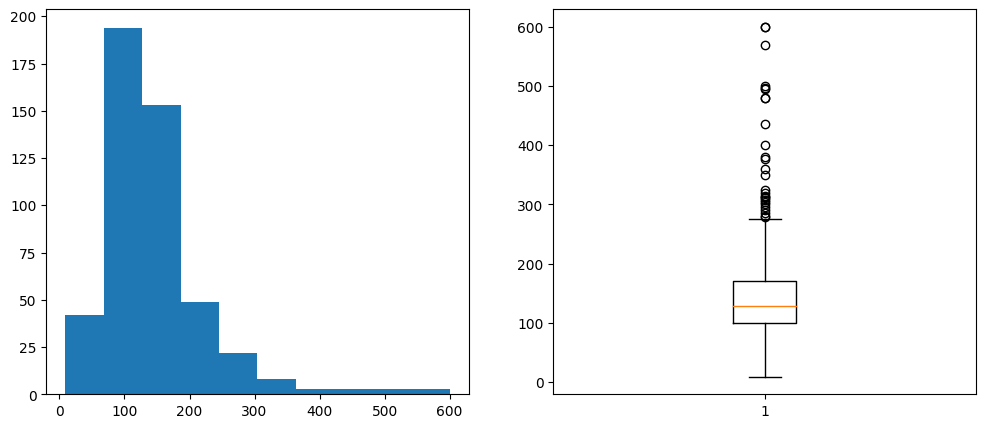

In [17]:
removeNA_df = df.dropna()
#LoanAmount
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.hist(removeNA_df['LoanAmount'])

ax = fig.add_subplot(122)
ax.boxplot(removeNA_df['LoanAmount'])
plt.show()

In [18]:
outliers_1 = 'yes'
skew_1 = 'right'

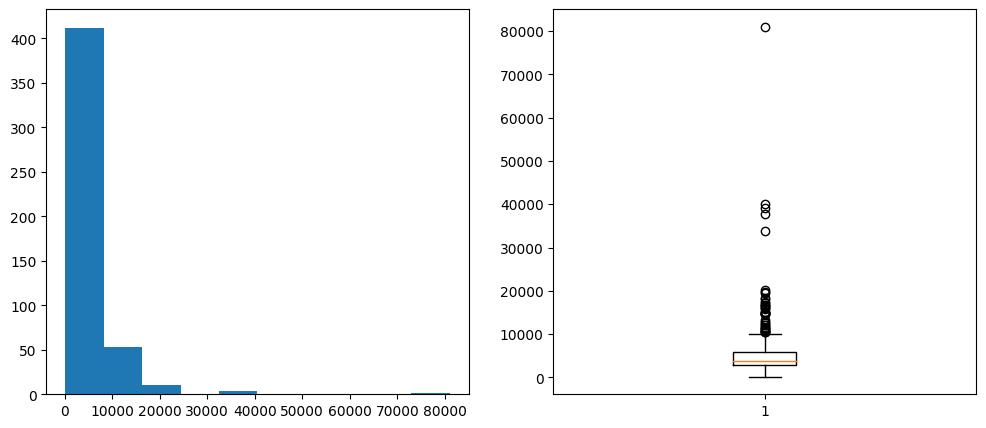

In [19]:
#ApplicantIncome
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.hist(removeNA_df['ApplicantIncome'])

ax = fig.add_subplot(122)
ax.boxplot(removeNA_df['ApplicantIncome'])
plt.show()

In [20]:
outliers_2 = 'yes'
skew_2 = 'right'

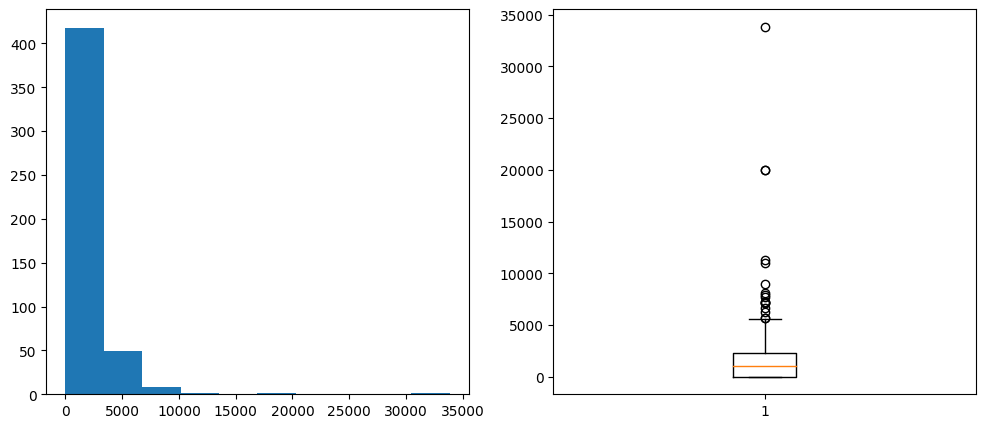

In [21]:
#CoapplicantIncome
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.hist(removeNA_df['CoapplicantIncome'])

ax = fig.add_subplot(122)
ax.boxplot(removeNA_df['CoapplicantIncome'])
plt.show()

In [22]:
outliers_3 = 'yes'
skew_3 = 'right'

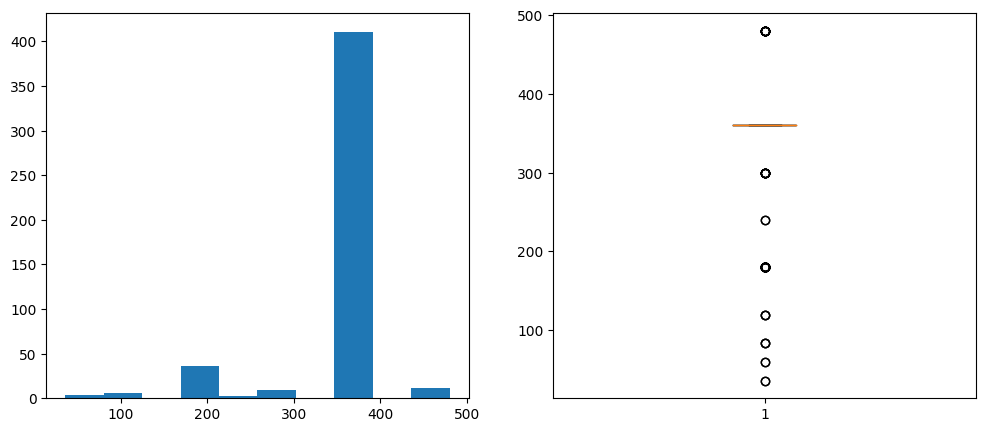

In [23]:
#Loan_Amount_Term
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.hist(removeNA_df['Loan_Amount_Term'])

ax = fig.add_subplot(122)
ax.boxplot(removeNA_df['Loan_Amount_Term'])
plt.show()

In [24]:
outliers_4 = 'yes'
amount_of_outliers = 'not much'

Perform CrossTabing between Gender and Loan_Status, and then plot the acceptance/rejection of loans for different Genders, and check whether Gender affects the Loan Status. Then do the same crosstabbing between the other variables (as specified) and Loan_Status, and analyze for each variable whether it affects the Loan Status or no.

**Note:** Don't forget to use the removeNA_df to derive your crosstabs

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


<Axes: xlabel='Gender'>

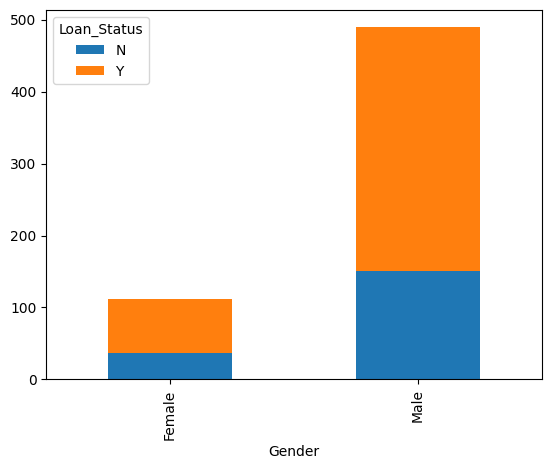

In [25]:
Gender = pd.crosstab(df.Gender,df.Loan_Status)
print(Gender)
Gender.plot(kind='bar',stacked=True)

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


<Axes: xlabel='Credit_History'>

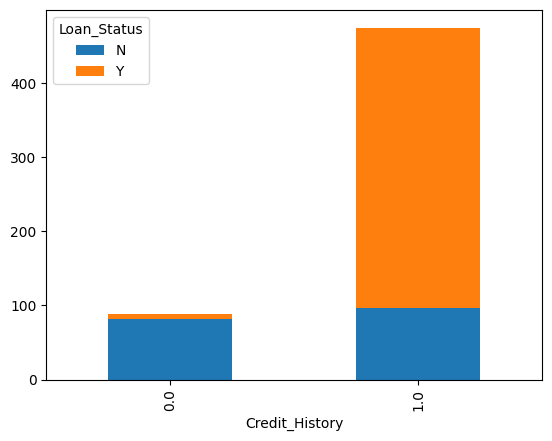

In [26]:
Credit_History=pd.crosstab(df.Credit_History,df.Loan_Status)
print(Credit_History)
Credit_History.plot(kind='bar',stacked=True)

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


<Axes: xlabel='Dependents'>

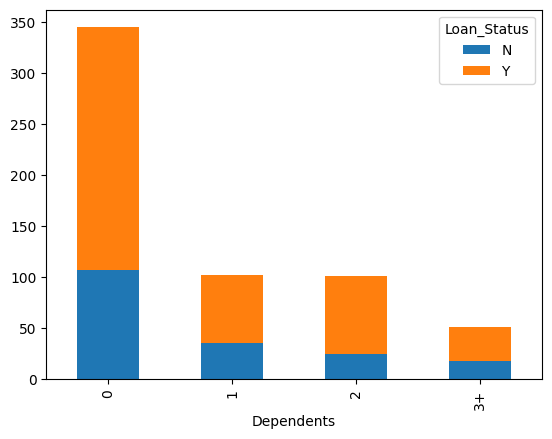

In [27]:
Dependents=pd.crosstab(df.Dependents,df.Loan_Status)
print(Dependents)
Dependents.plot(kind='bar',stacked=True)

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


<Axes: xlabel='Education'>

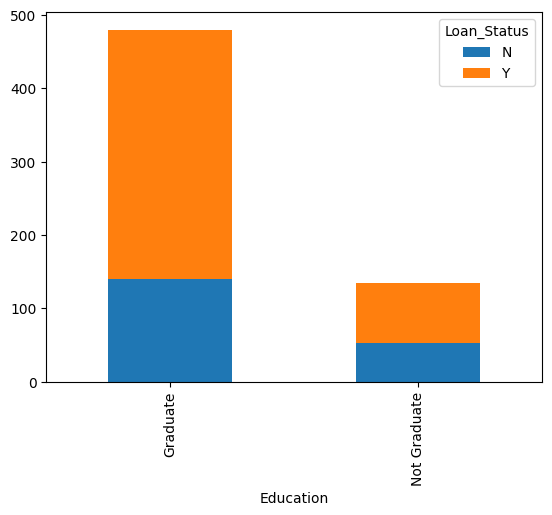

In [28]:
Education=pd.crosstab(df.Education,df.Loan_Status)
print(Education)
Education.plot(kind='bar',stacked=True)

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


<Axes: xlabel='Married'>

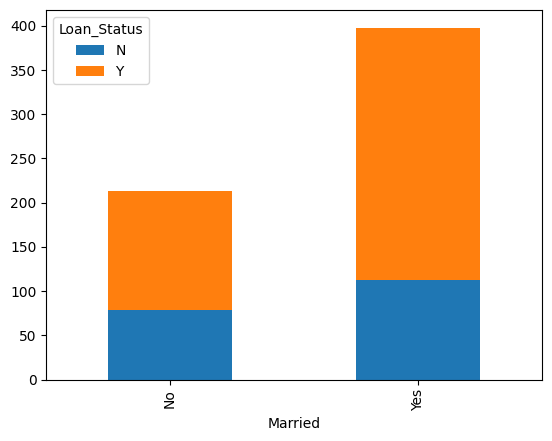

In [29]:
Married=pd.crosstab(df.Married,df.Loan_Status)
print(Married)
Married.plot(kind='bar',stacked=True)

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


<Axes: xlabel='Property_Area'>

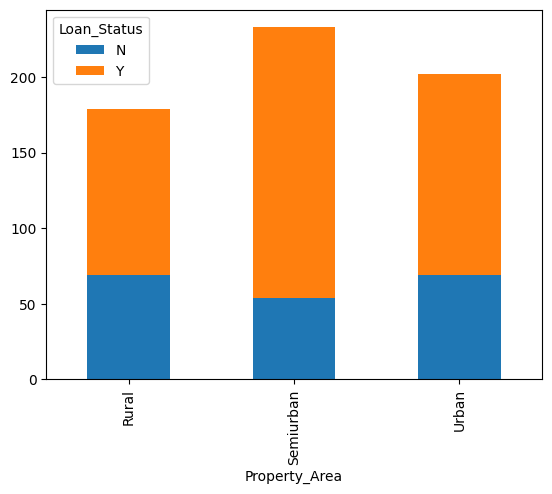

In [30]:
Property_Area=pd.crosstab(df.Property_Area,df.Loan_Status)
print(Property_Area)
Property_Area.plot(kind='bar',stacked=True)

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


<Axes: xlabel='Self_Employed'>

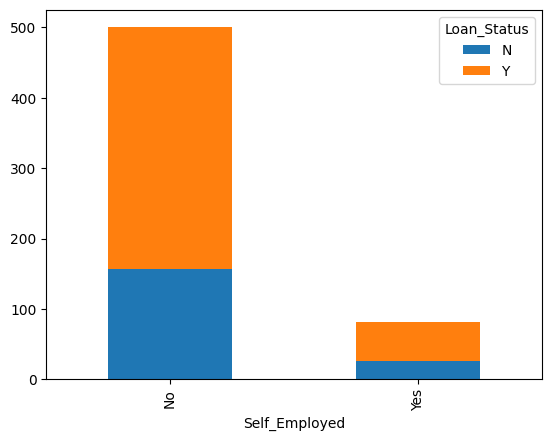

In [31]:
Self_Employed=pd.crosstab(df.Self_Employed,df.Loan_Status)
print(Self_Employed)
Self_Employed.plot(kind='bar',stacked=True)

**You will use your reaasoning of whether a variable affects the Loan acceptance or not in order to pick the most important features for your model later on.**

Plot a Scatter Plot between Loan_Status and:
* ApplicantIncome
* CoapplicantIncome
* LoanAmount
* LoanAmount_Term

**One plot per cell!**

Do you think these scatter plots gave you valuable information about the Loan_Status? Answer by "yes" or "no"

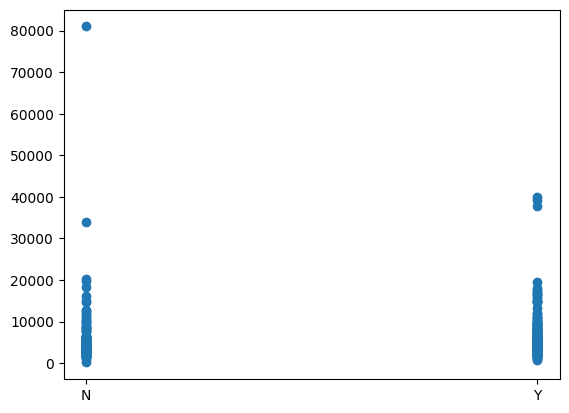

In [32]:
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['ApplicantIncome'])

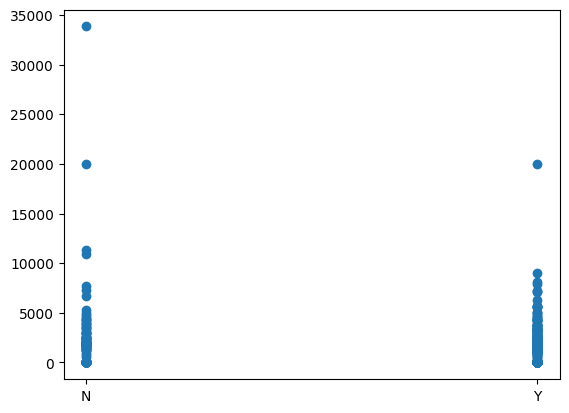

In [33]:
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['CoapplicantIncome'])

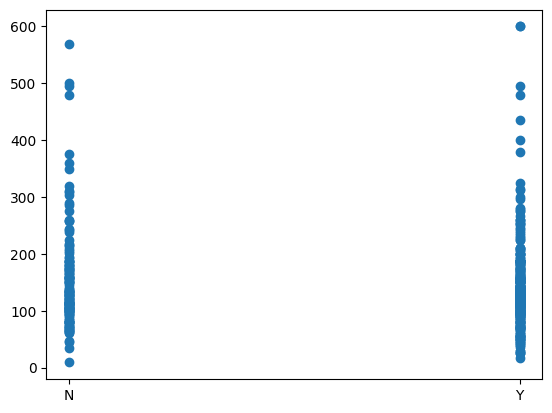

In [34]:
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['LoanAmount'])

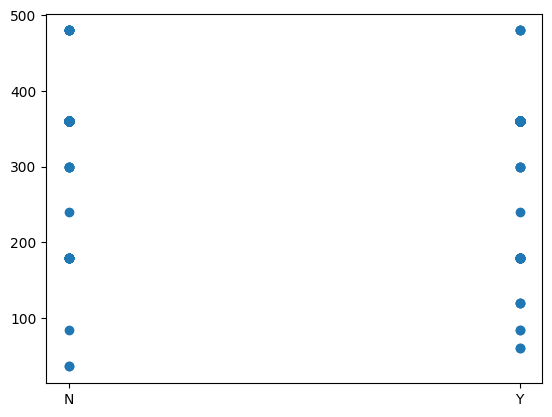

In [35]:
plt.scatter(removeNA_df['Loan_Status'],removeNA_df['Loan_Amount_Term'])

In [36]:
were_scatter_plots_helpful = "no"

Group your dataframe by Loan_Status on the **median** Value

In [37]:
median_df = df.groupby('Loan_Status').median()
print(median_df)

             ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_Status                                                                     
N                     3833.5              268.0       129.0             360.0   
Y                     3812.5             1239.5       126.0             360.0   

             Credit_History  
Loan_Status                  
N                       1.0  
Y                       1.0  


What did you deduce?

That the median of loan_status is very close or equal between (ApplicantIncome ,LoanAmount , Loan_Amount_Term and Credit_History ) however we can see that the median of coapplicantIncome is very different.
We can deduce that the CoapplicantIncome has a strong effect on the approval/rejection of the loan while the other features are not as important.

# 5. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: normalize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns

Remove the features that do not contribute to the prediction of the loan status, and save the results in a new dataframe called **new_df**

In [38]:
new_df = df.drop(['Loan_ID','Gender','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

## Remove grabage data

If you go back to one of the EDA steps where you saw the unique values of Dependents, you can see that you have '3+' as a value. In order to make the algorithm learn from such information, you have to replace this with a number. We will replace it by 3.

In [39]:
new_df.Dependents = df['Dependents'].replace('3+',3)

## Convert continous data into categorical

Search for the feature that is contionuous but should be categorical and convert it

In [40]:
feature_to_convert = 'Credit_History' #Write the Feature Name AS IT IS in the dataset, as a string
new_df[feature_to_convert] = new_df['Credit_History'].astype('category')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 512
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Married            611 non-null    object  
 1   Dependents         599 non-null    object  
 2   Education          614 non-null    object  
 3   CoapplicantIncome  614 non-null    float64 
 4   Credit_History     564 non-null    category
 5   Property_Area      614 non-null    object  
 6   Loan_Status        614 non-null    object  
dtypes: category(1), float64(1), object(5)
memory usage: 34.3+ KB


## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continous data with mean


In [41]:
col_with_missing_values = new_df.isnull().sum()
print(col_with_missing_values)
#To check which features has missing values and we only have for married , dependants and credit_history

new_df['Married'].fillna(new_df['Married'].mode()[0], inplace=True)
new_df['Dependents'].fillna(new_df['Dependents'].mode()[0], inplace=True)
new_df['Credit_History'].fillna(new_df['Credit_History'].mode()[0], inplace=True)

new_df.info()


Married               3
Dependents           15
Education             0
CoapplicantIncome     0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 512
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Married            614 non-null    object  
 1   Dependents         614 non-null    object  
 2   Education          614 non-null    object  
 3   CoapplicantIncome  614 non-null    float64 
 4   Credit_History     614 non-null    category
 5   Property_Area      614 non-null    object  
 6   Loan_Status        614 non-null    object  
dtypes: category(1), float64(1), object(5)
memory usage: 34.3+ KB


## Encode categorical data

Create a dataframe "cat_data" that contains your categorical variables, and a dataframe "num_data" that contains your numerical variables. Go over your categorical features and encode them (change their values to be numerical to be able to feed them to an algorithm and get a model in the end)

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_data=new_df[['Credit_History','Education','Married','Property_Area','Loan_Status']]#had to
#remove dependents for now because it was giving me error as it is already encoded
num_data=new_df[['CoapplicantIncome']]
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data = pd.concat([cat_data,new_df['Dependents']], axis = 1)
cat_data['Dependents'] = cat_data['Dependents'].astype(int)
#pd.concat(cat_data,new_df['Dependents'])
cat_data.head()


,Credit_History,Education,Married,Property_Area,Loan_Status,Dependents
0,1,0,1,1,0,0
1,1,0,0,0,0,0
2,1,0,1,0,1,3
3,1,0,1,1,1,2
4,0,1,1,1,0,0


:Combine both cat_data and num_data into 1 dataframe named **final_df**

In [43]:
final_df = pd.concat([num_data,cat_data],axis=1)
final_df.head()

,CoapplicantIncome,Credit_History,Education,Married,Property_Area,Loan_Status,Dependents
0,6666.0,1,0,1,1,0,0
1,3666.0,1,0,0,0,0,0
2,3428.0,1,0,1,0,1,3
3,1632.0,1,0,1,1,1,2
4,1800.0,0,1,1,1,0,0


## Normalization

Normalize data ranges for all features (e.g., between 0 and 1)
First compute the maximum of each feature, and then divide each column by its maximum. After it, describe the data

In [44]:
final_df_max = final_df.max()

final_df = final_df.divide(final_df_max)
final_df

,CoapplicantIncome,Credit_History,Education,Married,Property_Area,Loan_Status,Dependents
0,0.159983,1.0,0.0,1.0,0.5,0.0,0.000000
1,0.087983,1.0,0.0,0.0,0.0,0.0,0.000000
2,0.082271,1.0,0.0,1.0,0.0,1.0,1.000000
3,0.039168,1.0,0.0,1.0,0.5,1.0,0.666667
4,0.043200,0.0,1.0,1.0,0.5,0.0,0.000000
...,...,...,...,...,...,...,...
508,0.072311,1.0,0.0,1.0,1.0,1.0,0.000000
509,0.000000,1.0,0.0,0.0,1.0,1.0,0.333333
510,0.030888,1.0,1.0,0.0,0.0,0.0,0.000000
511,0.048096,1.0,0.0,1.0,0.5,1.0,0.333333


# 6. Training & Validating

#### Splitting the dataset

Create a variable x for the inputs (Fetaures), and a variable y for the output ('Loan_Status')
Then, split the data between training (70%) and testing (30%). Use a random state of 42

In [45]:
from sklearn.model_selection import train_test_split
all_columns = ['Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome']
x= final_df[all_columns]
y = final_df['Loan_Status']
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.3, random_state =42)

#### Creating & Fitting the model

Create a Logistic Regression Model, and fit it on the training data you have

In [46]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(x_train,y_train)
print('Model trained!')

Model trained!


##Validating the model

Validate your model on the testing data, and compute the accuracy score of your predictions

In [47]:
from sklearn.metrics import accuracy_score
pred_val = model.predict(x_val)
print('Model score {}'.format(model.score(x_val,y_val)))

Model score 0.772972972972973


## Feature Importance

Evaluate the feature importance in your resulting model, and plot it

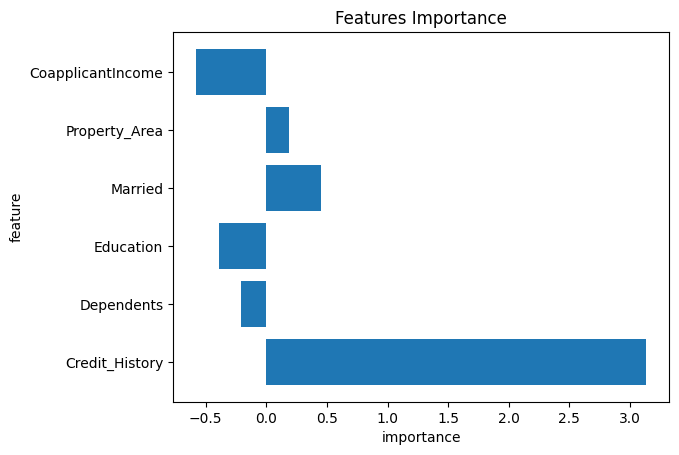

In [48]:
columns_names = all_columns
features_importance = model.coef_
features_importance = features_importance.flatten()
plt.barh(columns_names, features_importance)
plt.title('Features Importance')
plt.xlabel('importance')
plt.ylabel('feature')
plt.show()

What is the most import feature? Write the name as it appears in the dataset (as a string)

In [49]:
most_important = 'Credit_History'

## Submission

Make sure you have run all cells (UNLESS MENTIONED OTHERWISE) in your notebook in order before running the cell below, so that all images/graphs appear in the output. **Download your notebook as .ipynb file and put it in a zip folder, then upload that folder to the platform**